In [ ]:

import kagglehub
fruits_fresh_and_rotten_for_classification_path = kagglehub.dataset_download('sriramr/fruits-fresh-and-rotten-for-classification')
print('Data source import complete.')


Using Colab cache for faster access to the 'fruits-fresh-and-rotten-for-classification' dataset.
Data source import complete.


In [ ]:


import numpy as np
import pandas as pd
import os


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [ ]:


TRAIN_PATH = f"{fruits_fresh_and_rotten_for_classification_path}/dataset/train"
TEST_PATH  = f"{fruits_fresh_and_rotten_for_classification_path}/dataset/test"

SIZE = (240, 240)

In [ ]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)


train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


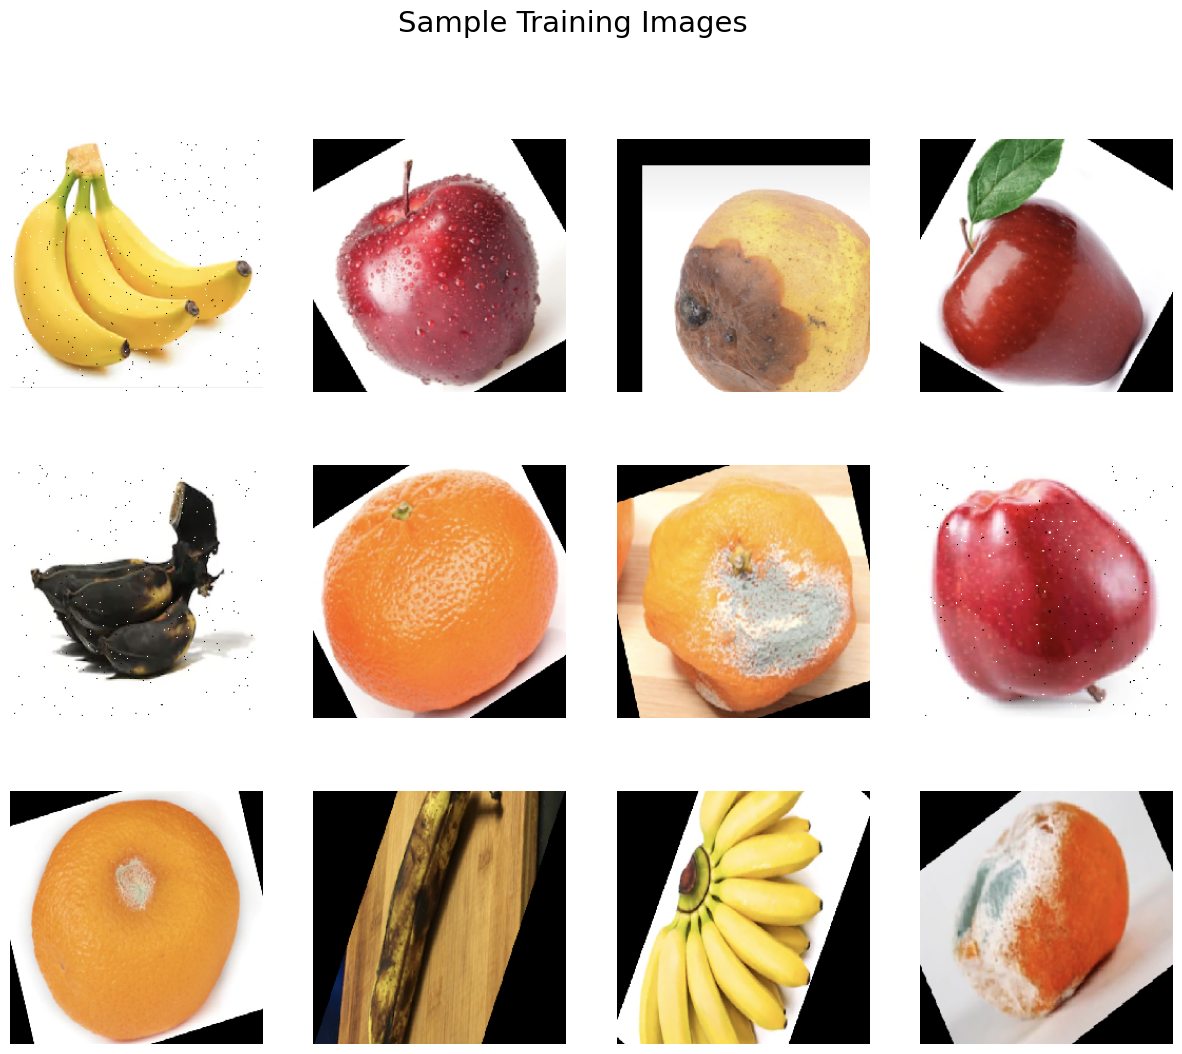

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")   # hides axis lines and ticks
        idx += 1

plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 117, 117, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 58, 58, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,947,078 (49.39 MB)

 Trainable params: 12,947,078 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=5,
    validation_data=val_dataset,
    validation_steps=len(val_dataset)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1421s 5s/step - accuracy: 0.5203 - loss: 1.3928 - val_accuracy: 0.8750 - val_loss: 0.3480
Epoch 2/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1401s 5s/step - accuracy: 0.8835 - loss: 0.3244 - val_accuracy: 0.8934 - val_loss: 0.2921
Epoch 3/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1456s 5s/step - accuracy: 0.9127 - loss: 0.2268 - val_accuracy: 0.9522 - val_loss: 0.1423
Epoch 4/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1385s 5s/step - accuracy: 0.9511 - loss: 0.1339 - val_accuracy: 0.9439 - val_loss: 0.1598
Epoch 5/5
307/307 ━━━━━━━━━━━━━━━━━━━━ 1383s 5s/step - accuracy: 0.9620 - loss: 0.1008 - val_accuracy: 0.9678 - val_loss: 0.0961


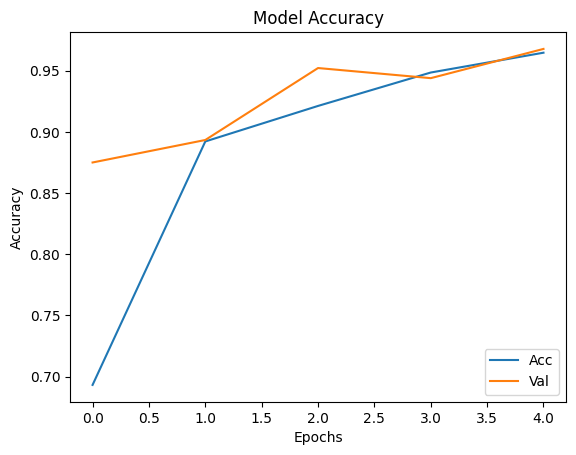

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

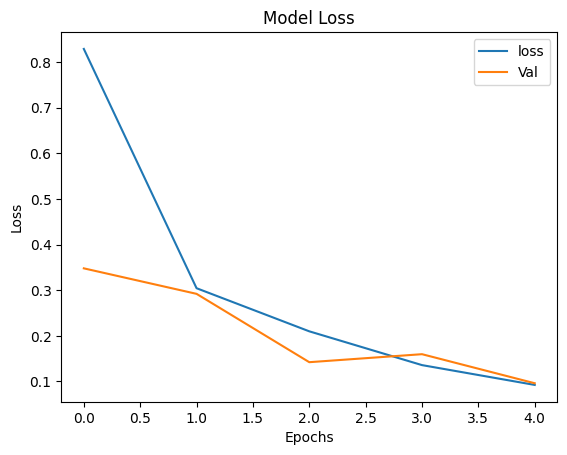

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 6 classes.
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 122s 45ms/step - accuracy: 0.9697 - loss: 0.0964
accuracy test:  0.9507042169570923
loss test:  0.14212140440940857


In [ ]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]
#     print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)


2698/2698 ━━━━━━━━━━━━━━━━━━━━ 124s 46ms/step


In [ ]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 6)


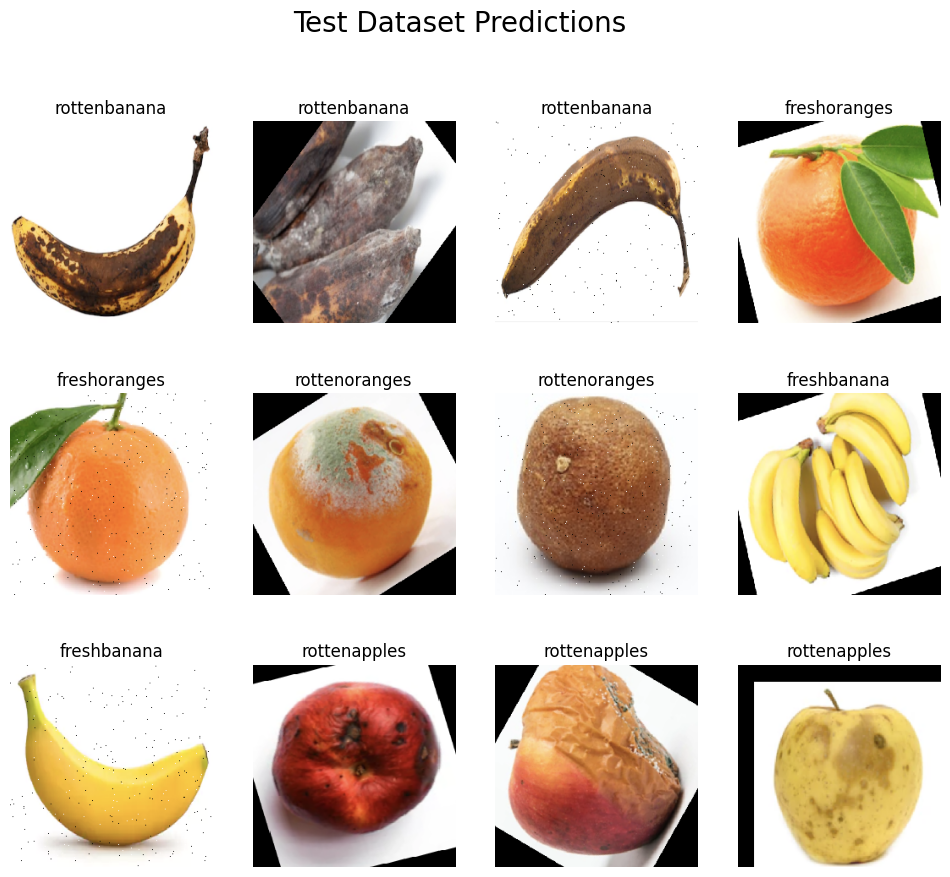

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
  print(true_classes)
  print(class_labels)

[0 0 0 ... 5 5 5]
['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [ ]:
import numpy as np

# Convert model predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Now generate report
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


               precision    recall  f1-score   support

 rottenbanana       0.95      0.99      0.97       530
 freshoranges       0.98      0.92      0.95       388
rottenoranges       0.90      0.97      0.93       403
  freshbanana       1.00      0.94      0.97       381
 rottenapples       0.95      0.91      0.93       601
  freshapples       0.94      0.97      0.96       395

     accuracy                           0.95      2698
    macro avg       0.95      0.95      0.95      2698
 weighted avg       0.95      0.95      0.95      2698



In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

Confusion Matrix
[[527   0   3   0   0   0]
 [  0 358  21   0   9   0]
 [  6   4 389   0   4   0]
 [  4   0   2 359   9   7]
 [ 15   2  18   0 549  17]
 [  0   3   0   0   9 383]]


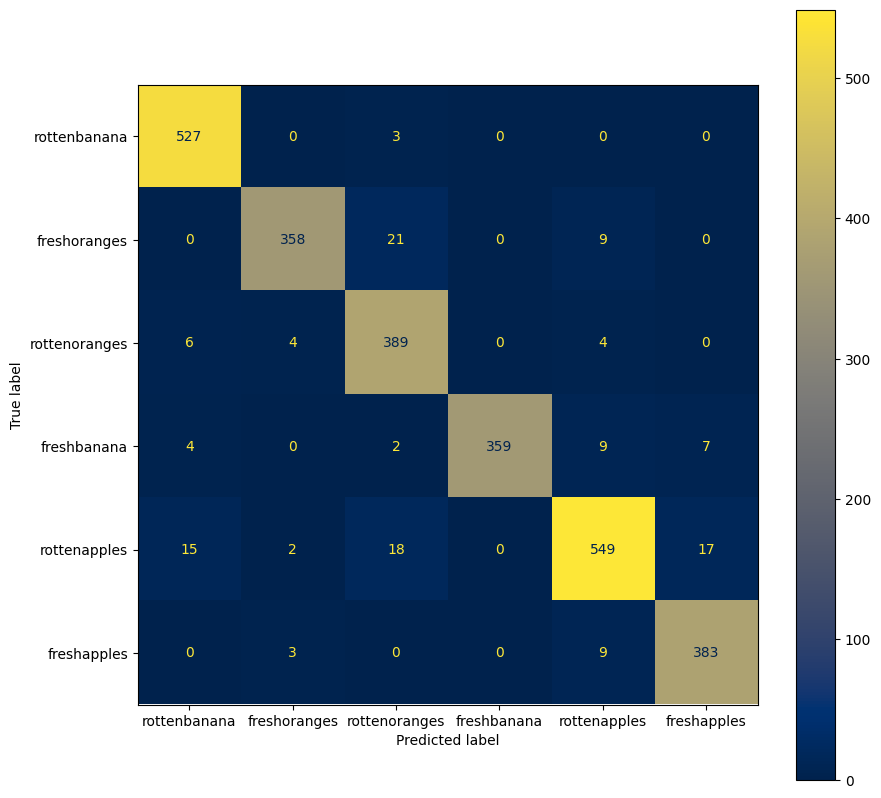

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the model in the recommended Keras format
model.save("/content/drive/MyDrive/fruit_freshness_detection_model.keras")



Mounted at /content/drive
